In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../dataset/telecom_churn_TRAINTEST.csv')
df_predict = pd.read_csv('../dataset/telecom_churn_PREDICT.csv')

# EDA 

## Check my dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

## Distribución del target

<Axes: xlabel='churn'>

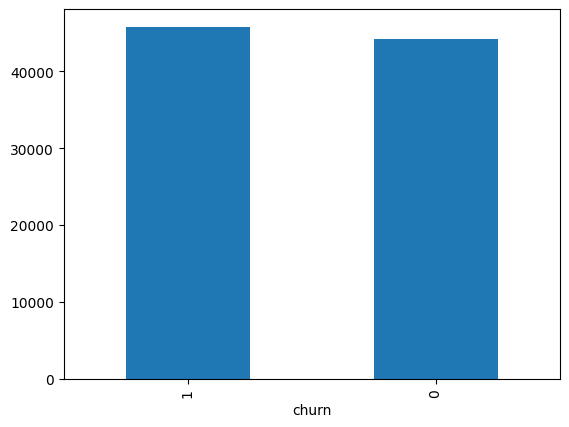

In [6]:
df['churn'].value_counts().plot(kind='bar')

In [7]:
print(df.shape)
df.head(1)

(90000, 100)


,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.5,0.2475,0.0,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.0,0.0,0.0,0.0,0.0,18.0,0.0,90.643333,0.0,97.176667,0.0,0.0,0.0,0.0,58.0,0.0,132.6,0.0,24.0,0.0,55.22,0.0,1.333333,52.333333,45.0,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.0,1504.62,1453.44,4085.0,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001


In [8]:
print(df_predict.shape)
df_predict.head(1)

(10000, 99)


,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,30.835,136.75,29.99,0.2475,1.25,0.5,0.5,0.0,0.0975,48.25,1.155,2.0,0.0,10.333333,0.0,13.333333,0.0,66.0,0.0,3.333333,0.0,40.666667,0.0,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.0,5.406667,1.333333,0.713333,0.333333,0.473333,30.0,0.0,54.5,0.0,13.666667,0.0,22.653333,0.0,12.333333,66.0,40.666667,0.0,0.0,7,1,1,U,AA,N,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.5,121,52,30,160.0,66.0,31.0,C,ATLANTIC SOUTH AREA,Y,N,149.98999,1.0,1.0,WCMB,0.0,0.0,R,NaN,M,M,1.0,M,3.0,NaN,C,NaN,1.0,U,U,U,U,U,U,Y,216.0,1090001


## Univariate analysis

In [9]:
#Use describe for categorical features
df.describe(include=object)

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,marital,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
count,90000,90000,90000,83463,89960,89999,89999,80481,60509,62022,88549,70597,56968,56236,88549,88549,88549,88549,88549,88549,88549
unique,3,54,2,5,19,4,2,3,2,2,5,1,6,15,16,2,2,2,2,2,2
top,U,AA,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,U,M,C,A,N,U,U,U,U,U,Y
freq,58812,34152,79401,29203,10293,65977,76624,67396,58729,44521,33050,70597,36093,43118,30400,84938,84308,81196,80497,79419,61716


In [10]:
#Use describe for number features
df.describe(include=np.number)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89405.000000,89405.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,88593.000000,88593.000000,88593.000000,89296.000000,89999.000000,89999.000000,88549.000000,88549.000000,63498.000000,69967.000000,67804.000000,46432.000000,88549.000000,89999.000000,9.000000e+04
mean,58.312895,504.277946,45.880669,0.877813,40.798976,13.289932,13.046046,0.240786,1.308197,-13.786987,-1.074666,5.769639,0.037837,3.999448,0.019737,26.843561,0.027811,141.375341,0.805435,53.713298,0.047781,106.483091,0.720050,1.648754,4.344852,3.444618,28.909037,0.269522,221.363949,1.689888,109.071366,24.268663,27.785579,7.712004,17.676245,86.999369,0.334957,171.309285,0.654335,64.103954,0.385096,159.080481,1.035109,9.826661,142.180776,107.203141,0.010415,1.732817,0.508889,19.263856,1.555067,1.366522,2970.669433,7874.976570,1065.717715,994.546384,7776.807032,2931.320344,57.288343,472.052308,170.568866,510.539844,178.227000,58.802889,501.598490,176.320082,58.266691,99.709575,1.802987,1.556184,0.197190,0.086867,6.180856,2.538197,5.809274,1.568896,0.059255,402.419438,1.045000e+06
std,46.084103,516.170057,23.370435,2.173665,96.970619,30.123282,29.719581,3.012631,15.374215,271.624916,50.565668,8.673272,0.885448,10.603489,0.699317,37.315217,0.501246,155.486573,8.455179,85.537833,2.176283,116.845898,7.679230,5.148484,12.141729,10.049161,54.960177,1.003104,257.220079,21.905864,160.081469,33.913196,47.948938,15.908932,40.382222,102.308064,3.890521,205.794020,7.335297,89.736523,4.393926,228.966797,16.988064,15.081650,156.468555,117.776670,0.465963,5.260407,0.499924,9.149764,1.095305,0.661085,3887.921200,8869.646079,865.305299,851.715318,8802.189472,3855.692056,35.430616,425.257319,165.134394,524.737209,191.398108,46.476204,489.911616,181.593174,40.483529,60.788920,1.319121,0.900798,0.397879,0.281642,4.741242,1.452650,2.176928,0.628308,0.236103,252.821660,2.598091e+04
min,-5.862500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,23.750000,9.320000,0.000000,0.000000,2.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,3

In [11]:
# Create a function for check other inputs of my features

def analyze_variable(dataset, columns):
    results = {}
    for col in columns:
        results[col]={
           'unique_value': dataset[col].value_counts(),
           'unique_count': dataset[col].nunique(),
           'nulls_values': dataset[col].isnull().sum()

        }
    return results

In [12]:
analyze_total = analyze_variable(df, list(df.columns))

In [13]:
for col, results in analyze_total.items():
    print(f'Analysis for {col}: ')
    print(f"nunique values: {results['unique_count']}")
    print(f"nulls values: {results['nulls_values']}")
    print('<-------------------------------------->')

Analysis for rev: 
nunique values: 35160
nulls values: 134
<-------------------------------------->
Analysis for mou: 
nunique values: 9180
nulls values: 134
<-------------------------------------->
Analysis for totmrc: 
nunique values: 7676
nulls values: 134
<-------------------------------------->
Analysis for da: 
nunique values: 163
nulls values: 134
<-------------------------------------->
Analysis for ovrmou: 
nunique values: 2484
nulls values: 134
<-------------------------------------->
Analysis for ovrrev: 
nunique values: 11300
nulls values: 134
<-------------------------------------->
Analysis for vceovr: 
nunique values: 7143
nulls values: 134
<-------------------------------------->
Analysis for datovr: 
nunique values: 689
nulls values: 134
<-------------------------------------->
Analysis for roam: 
nunique values: 5048
nulls values: 134
<-------------------------------------->
Analysis for change_mou: 
nunique values: 7127
nulls values: 595
<----------------------------

## Datacleaing

## Check duplicated

In [14]:
# For Train
df[df.duplicated(keep=False)]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID


In [15]:
# For predict
df_predict[df_predict.duplicated(keep=False)]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID


# Plot about nulls of dataset

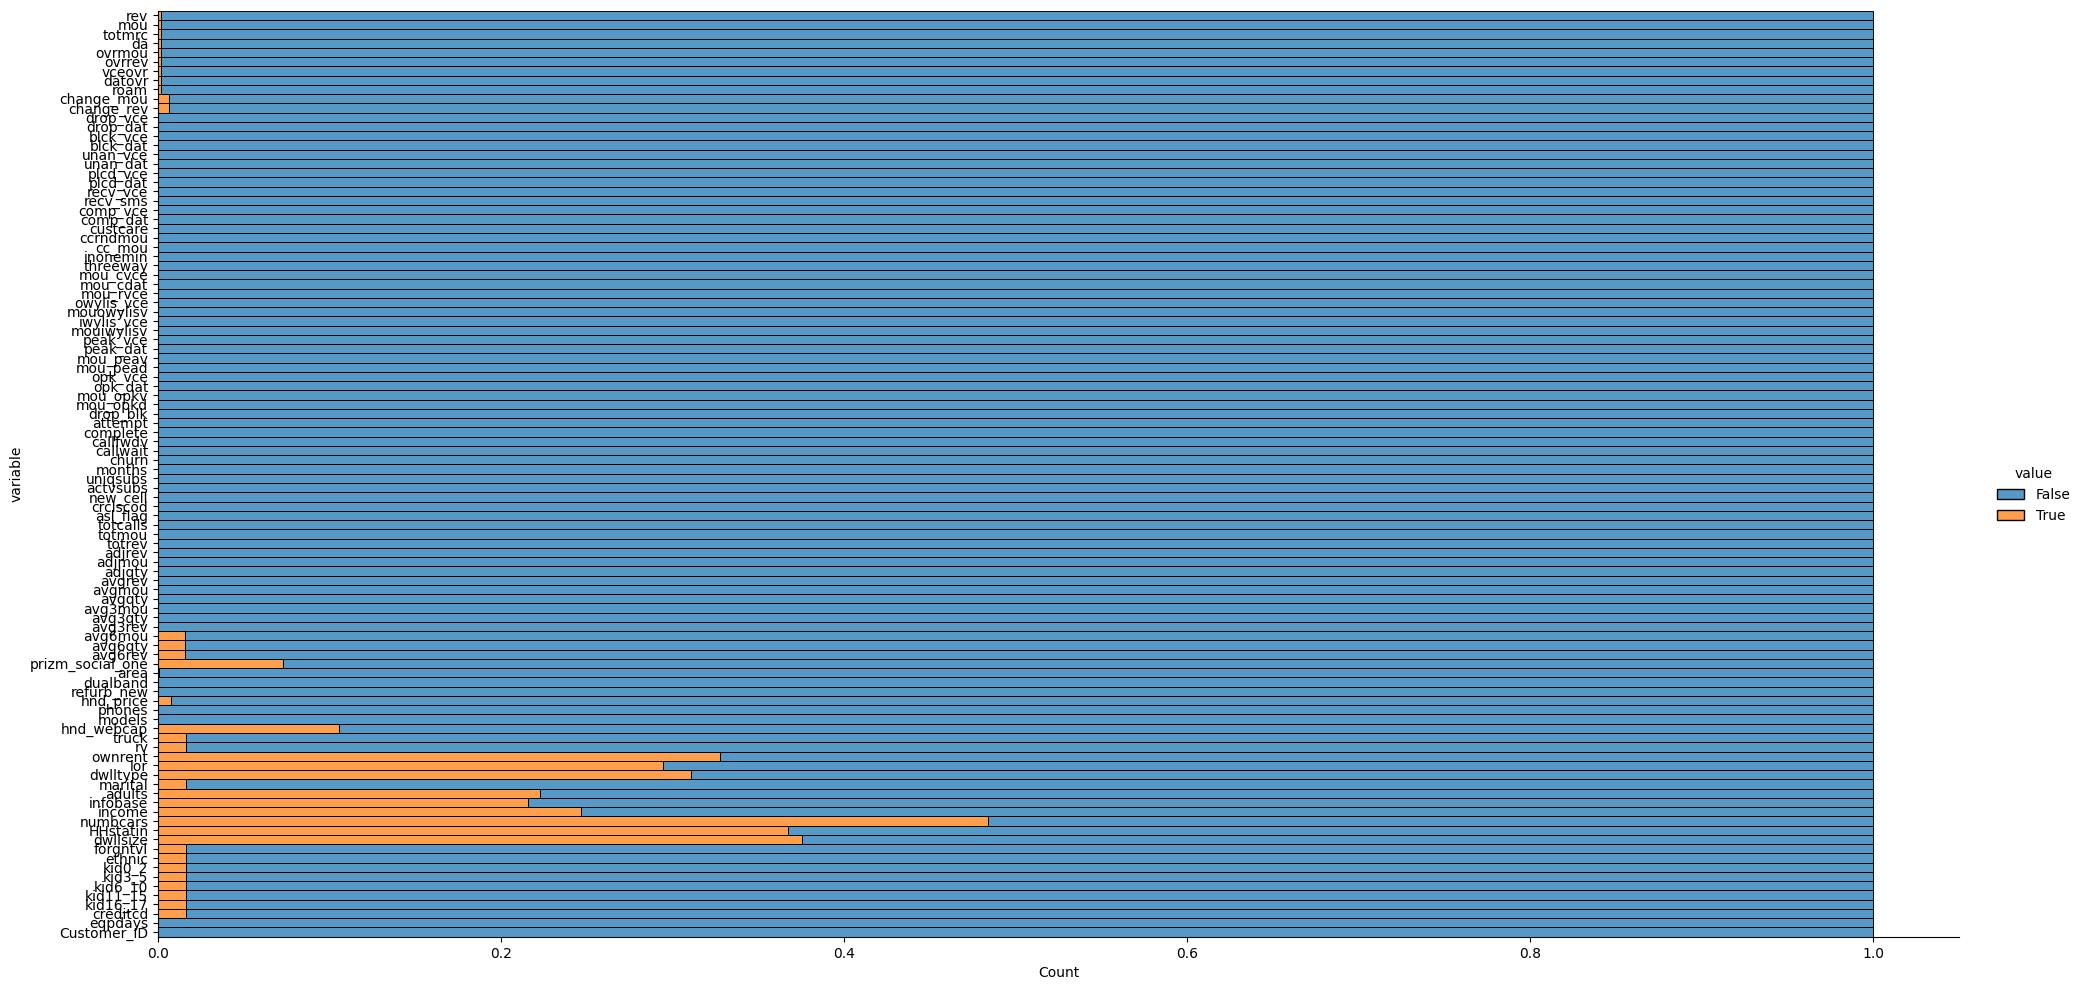

In [16]:
# Plot about nulls of training dataset
df.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

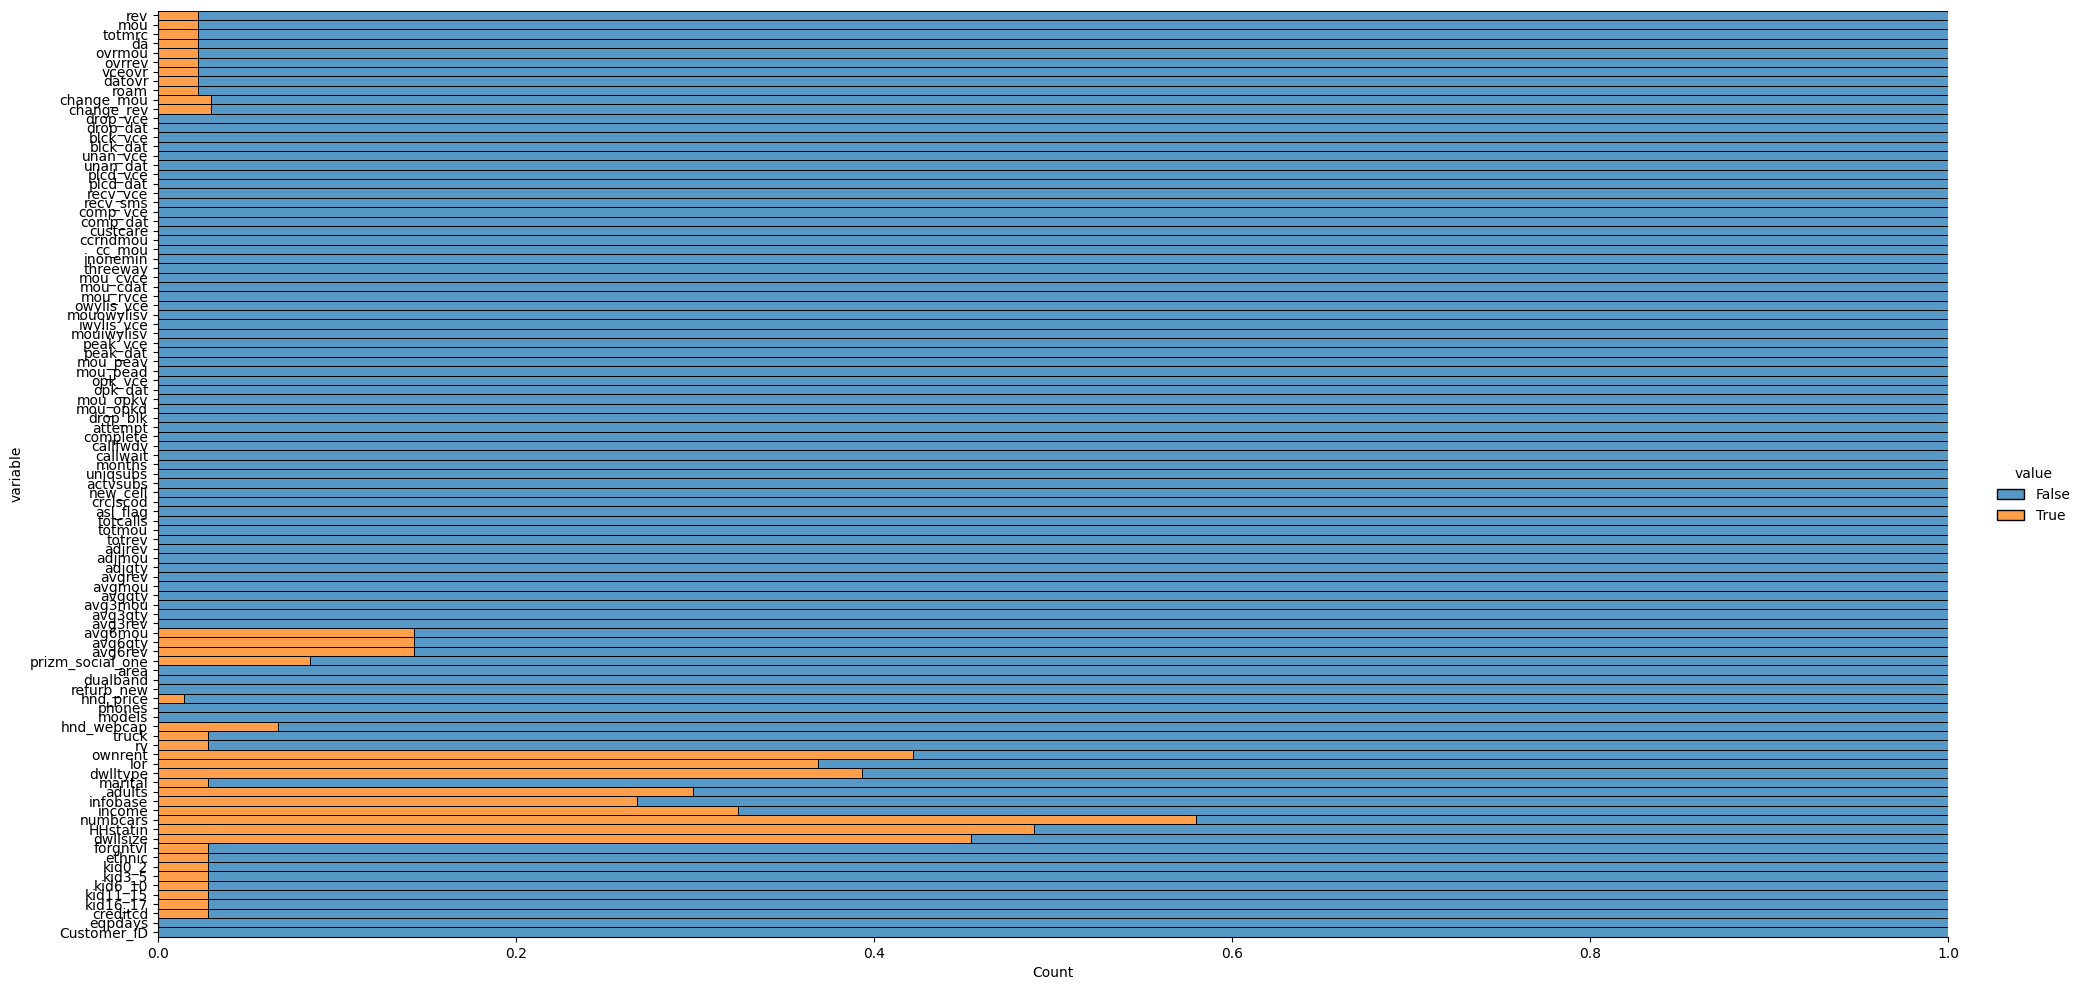

In [17]:
# Plot about nulls of training dataset
df_predict.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

### After viewing the number of nulls, i see that there are 4 columns that have more than 40% null in the dataset, 
### I proceed to eliminate these 4 columns from both datasets

In [18]:
list_to_delete = ['numbcars','HHstatin','dwllsize','ownrent']
for i in list_to_delete:
    del(df[i])
    del(df_predict[i])


### in the Train dataset, we see that there are nulls in several columns, less than 5% of the values of dataset total. I proceed to eliminate the rows corresponding to those nulls

In [19]:
for i in df.columns:
    if df[i].isnull().sum()< 0.05*len(df):
        df.dropna(subset=[i], inplace=True)

In [20]:
df.shape

(85925, 96)

### I group in a lits, the variables that still retain nulls


In [21]:
variables_to_analyze = []
for i in df.columns:
    if (df[i].isnull().sum() / len(df)) > 0.05:
      variables_to_analyze.append(i)
      print(i)


prizm_social_one
hnd_webcap
lor
dwlltype
adults
infobase
income


In [22]:
#I delete infobase column of both datasets, because it contains only one value
del(df['infobase'])
del(df_predict['infobase'])

## Input nulls

In [23]:
#Function that gives me the information i need about a variable
def describe_variable(dataset, feature):
    print(f"nulls : {dataset[feature].isnull().sum()}")
    print(f"normalize : {dataset[feature].value_counts(normalize=True)}")


In [24]:
# Function that replace nulls in proportion of other values
def rellenar_nulos_proporcion(df, columna):
    # Gets the distribution of null values
    distribucion = df[columna].value_counts(normalize=True)

    # Replace nulls with the created distribution
    df[columna] = df[columna].apply(
        lambda x: np.random.choice(distribucion.index, p=distribucion.values) if pd.isnull(x) else x
    )

    return df

In [25]:
#i remove 'infobase' from  my list
variables_to_analyze.pop(-2)

'infobase'

In [26]:
for i in variables_to_analyze:
  rellenar_nulos_proporcion(df, i)
  rellenar_nulos_proporcion(df_predict,i)

### After performing the univariate analysis we realized that there are columns in which one value predominates more than 95% of the time, so these columns do not provide us with much information, and therefore we eliminate them. To do this we create the following function:

In [27]:
# Function to eliminate columns in wich one value predominates more than 95% of the time
def analyze_and_remove_highly_repeated_columns(df, threshold=0.95):



    for col in df.columns:
        value_counts_normalized = df[col].value_counts(normalize=True)

        # Verificate if  there is any value that exceed the threshold
        if any(value_counts_normalized > threshold):
            print(f"Columna '{col}' tiene un valor que se repite más del {threshold * 100}% de las veces.")
            print(f"Valores y sus frecuencias:\n{value_counts_normalized}\n")

            # Delete the column of DataFrame original
            df.drop(columns=[col], inplace=True)
            print(f"Columna '{col}' eliminada del DataFrame.\n")

In [28]:
analyze_and_remove_highly_repeated_columns(df, threshold=0.95)

Columna 'drop_dat' tiene un valor que se repite más del 95.0% de las veces.
Valores y sus frecuencias:
drop_dat
0.000000      0.976177
0.333333      0.010288
0.666667      0.004853
1.000000      0.002095
1.333333      0.001548
1.666667      0.000943
2.000000      0.000640
2.333333      0.000466
2.666667      0.000349
3.000000      0.000291
3.333333      0.000279
4.000000      0.000244
3.666667      0.000186
5.000000      0.000163
4.333333      0.000140
5.333333      0.000116
4.666667      0.000105
6.000000      0.000093
6.333333      0.000081
9.333333      0.000081
7.333333      0.000070
5.666667      0.000070
6.666667      0.000058
8.333333      0.000058
10.000000     0.000047
8.000000      0.000047
7.000000      0.000047
9.666667      0.000035
10.666667     0.000035
11.000000     0.000023
13.000000     0.000023
9.000000      0.000023
12.000000     0.000023
18.666667     0.000023
48.333333     0.000012
27.666667     0.000012
18.333333     0.000012
81.000000     0.000012
11.666667     

In [29]:
# Delete ths columns sames in dataset Predict
list_to_delete2=['drop_dat',"blck_dat","unan_dat","recv_sms",'callfwdv','kid0_2','kid3_5']

In [30]:
for i in list_to_delete2:
  del(df_predict[i])

In [31]:
# Check
print(df.shape)
print(df_predict.shape)

(85925, 88)
(10000, 87)


### After doing the description in the EDA we realize that there are columns in wich there are negative values that do not agree much with the meaning of the varibale. Therefore we correct those values

In [32]:
# Function for group negative values
def columnas_con_min_negativo(df):
    
    description = df.describe(include=[np.number]).T

    # Filtrar las columnas que tienen valores negativos en "min"
    columns_negative = description [description ['min'] < 0].index.tolist()

    return columns_negative

In [33]:
#for dataset train
columns_negatives = columnas_con_min_negativo(df)
#for dataset predict
columns_negatives = columnas_con_min_negativo(df_predict)

### After evaluating the negative values, we conclude that the "eqpdays" column cannot be negative

In [34]:
df_mean_eqpdays= df[df['eqpdays']>0]

In [35]:
# Input negative values with the mean of positive values
df['eqpdays'] = np.where(df["eqpdays"]<0,df_mean_eqpdays['eqpdays'].mean(),df['eqpdays'])
df_predict['eqpdays'] = np.where(df_predict["eqpdays"]<0,df_mean_eqpdays['eqpdays'].mean(),df_predict['eqpdays'])

## Analysis Variable - Target

### We separate the categorical and numerical variables

In [36]:
target=['churn']
def get_list_var(dataset):
    list_numbers=[]
    list_booleans=[]
    list_categories=[]

    for i in dataset:
      if (i not in target) and (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and (len(dataset[i].unique()) != 2):
        list_numbers.append(i)
      elif (i not in target) and (dataset[i].dtype.kind == 'b') and (len(dataset[i].unique())==2):
        list_booleans.append(i)
      elif (dataset[i].dtype.kind != 'o' and (i not in target)):
        list_categories.append(i)

    return list_numbers, list_booleans, list_categories

In [37]:
l_numericas, l_booleanos, l_categoricas = get_list_var(df)
l_numericas_pred, l_booleanos_pred, l_categoricas_pred = get_list_var(df_predict)

### Graphic numberical variables with Scatterplot to indetify outaliers and eliminate those that are very obvius

In [ ]:
# for i in l_numericas:
#     sns.scatterplot(data=df, x=i, y='churn', hue="churn")
#     plt.show()

### After  a visual inspection of the graphs, we proceed to eliminate the most obvius outliers

In [38]:
df.drop(df[df['rev']>3500].index, inplace=True)
df.drop(df[df['mou']>10000].index, inplace=True)
df.drop(df[df['da']>100].index, inplace=True)
df.drop(df[df['datovr']>200].index, inplace=True)
df.drop(df[df['recv_vce']>2500].index, inplace=True)
df.drop(df[df['custcare']>400].index, inplace=True)
df.drop(df[df['threeway']>50].index, inplace=True)
df.drop(df[df['mou_cdat']>2000].index, inplace=True)
df.drop(df[df['mouowylisv']>1000].index, inplace=True)
df.drop(df[df['iwylis_vce']>400].index, inplace=True)
df.drop(df[df['mou_pead']>500].index, inplace=True)
df.drop(df[df['uniqsubs']>50].index, inplace=True)
df.drop(df[df['adjmou']>200000].index, inplace=True)
df.drop(df[df['avg3qty']>3500].index, inplace=True)

## Remove high correlation

In [39]:
corr = df.corr(numeric_only=True)

In [40]:
# Filter the correlation major than 0.89
high_corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.89]

# I get the correlation of all variables with "churn"
churn_corr = corr['churn']

# create results table
results = []

for (var1, var2), corr_value in high_corr_pairs.items():
    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Correlation': corr_value,
        'Correlation with churn (Variable 1)': churn_corr.get(var1, np.nan),
        'Correlation with churn (Variable 2)': churn_corr.get(var2, np.nan)
    })

results_df = pd.DataFrame(results)

# Mostrar la tabla
print("Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':")
print(results_df.to_string(index=False))

Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':
Variable 1 Variable 2  Correlation  Correlation with churn (Variable 1)  Correlation with churn (Variable 2)
       rev    avg3rev     0.957333                            -0.016380                            -0.017871
       mou    avg3mou     0.984953                            -0.059060                            -0.051665
       mou    avg6mou     0.949648                            -0.059060                            -0.043732
    ovrmou     ovrrev     0.961321                             0.016668                             0.021178
    ovrmou     vceovr     0.959295                             0.016668                             0.021519
    ovrrev     vceovr     0.996936                             0.021178                             0.021519
  plcd_vce   comp_vce     0.985582                            -0.046017                            -0.049635
  plcd_vce    attempt     0.998568                    

In [43]:
# I filter that the correlation are major than 0.90
high_corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs.abs() > 0.90]

# Obtener la correlación de todas las variables con "churn"
churn_corr = corr['churn']

# Create list for delete
columns_to_drop = set()

for (var1, var2), corr_value in high_corr_pairs.items():
    corr_with_churn_var1 = churn_corr.get(var1, np.nan)
    corr_with_churn_var2 = churn_corr.get(var2, np.nan)

    # Delete the column with minor correlation with "Churn"
    if abs(corr_with_churn_var1) > abs(corr_with_churn_var2):
        columns_to_drop.add(var2)
    else:
        columns_to_drop.add(var1)

### The Customer_ID column is in the "columns_to_drop" list, so i drop it since i need to locate my customers

In [44]:
columns_to_drop.remove('Customer_ID')

In [45]:
# Delete columns of the list "columns_to_drop"
for i in columns_to_drop:
    del(df[i])
    del(df_predict[i])

### We create two variable that contain our categorical variables on one side and our numerical variables on the other

In [46]:
df_categoricas = list(df.describe(include=object).columns)
df_numericas = list(df.describe(include=np.number).columns)

## Delete low variance